# Flight Price Prediction Project

Group 4 
1. Hansen Thadeus Wijaya (00000043037)
2. Kevin Gabriel (00000043270)
3. Ryan Gunawan (00000043095)

# Import & Data Information

In [1]:
#Proses import library yang akan digunakan

import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
#Proses import data 
dfprice = pd.read_csv("FlightPrice.csv")

dfprice

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [3]:
#Menghapus column unnamed 
dfprice.drop(['Unnamed: 0'], axis = 1)

#Mendapatkan info tipe data 
dfprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [4]:
#Membuat statistik data 
dfprice.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [5]:
#Membuat Korelasi Data
dfprice.corr()

,Unnamed: 0,duration,days_left,price
Unnamed: 0,1.000000,0.159007,0.014638,0.761177
duration,0.159007,1.000000,-0.039157,0.204222
days_left,0.014638,-0.039157,1.000000,-0.091949
price,0.761177,0.204222,-0.091949,1.000000


In [6]:
#Menghitung jumlah baris dan kolom
dfprice.shape

(300153, 12)

In [7]:
#Mengelompokkan berdasarkan maskapai dan jumlah penerbangan
df_grouped = dfprice.groupby(['flight', 'airline'], as_index = False).count()
df_grouped.airline.value_counts()

Indigo       704
Air_India    218
GO_FIRST     205
SpiceJet     186
Vistara      133
AirAsia      115
Name: airline, dtype: int64

# Data Visualization

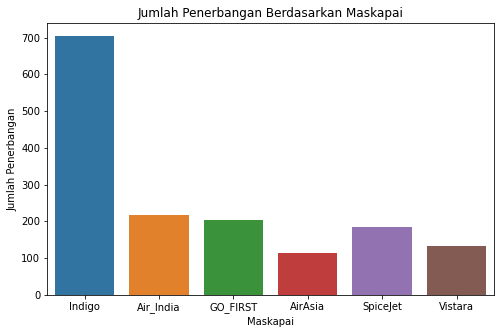

In [8]:
#Membuat visualisasi data jumlah penerbangan dengan maskapai
plt.figure(figsize = (8, 5))
sns.countplot(x = df_grouped.airline)
plt.title('Jumlah Penerbangan Berdasarkan Maskapai')
plt.xlabel("Maskapai")
plt.ylabel("Jumlah Penerbangan")
plt.show();

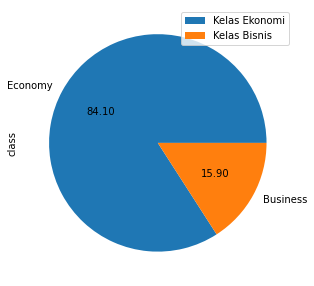

In [9]:
#Membuat visualisasi data kelas penerbangan dengan jumlah penerbangan
df_grouped2 = dfprice.groupby(['flight', 'airline','class'], as_index = False).count()
df_grouped2['class'].value_counts()

plt.figure(figsize = (8,5))
df_grouped2['class'].value_counts().plot(kind = 'pie', autopct = "%.2f")
plt.legend(['Kelas Ekonomi','Kelas Bisnis'])
plt.show()

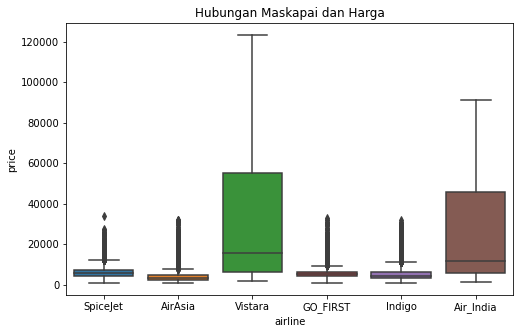

In [10]:
#Membuat BoxPlot hubungan maskapai dengan harga tiket
plt.figure(figsize = (8,5))
sns.boxplot(data=dfprice, x="airline", y="price")
plt.title("Hubungan Maskapai dan Harga")
plt.show()

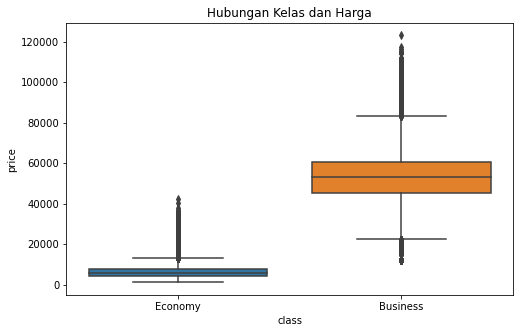

In [11]:
#Membuat BoxPlot hubungan kelas penerbangan dengan harga tiket
plt.figure(figsize = (8,5))
sns.boxplot(data=dfprice, x="class", y="price")
plt.title("Hubungan Kelas dan Harga")
plt.show()

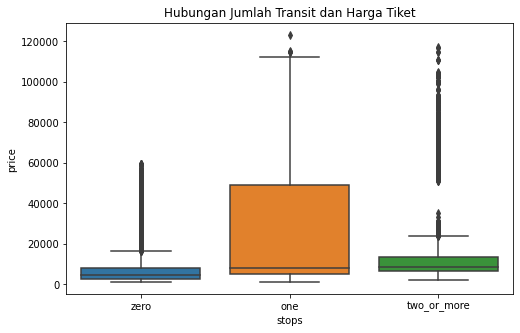

In [12]:
#Membuat BoxPlot hubungan jumlah transit dengan harga tiket
plt.figure(figsize = (8,5))
sns.boxplot(data=dfprice, x="stops", y="price")
plt.title("Hubungan Jumlah Transit dan Harga Tiket")
plt.show()

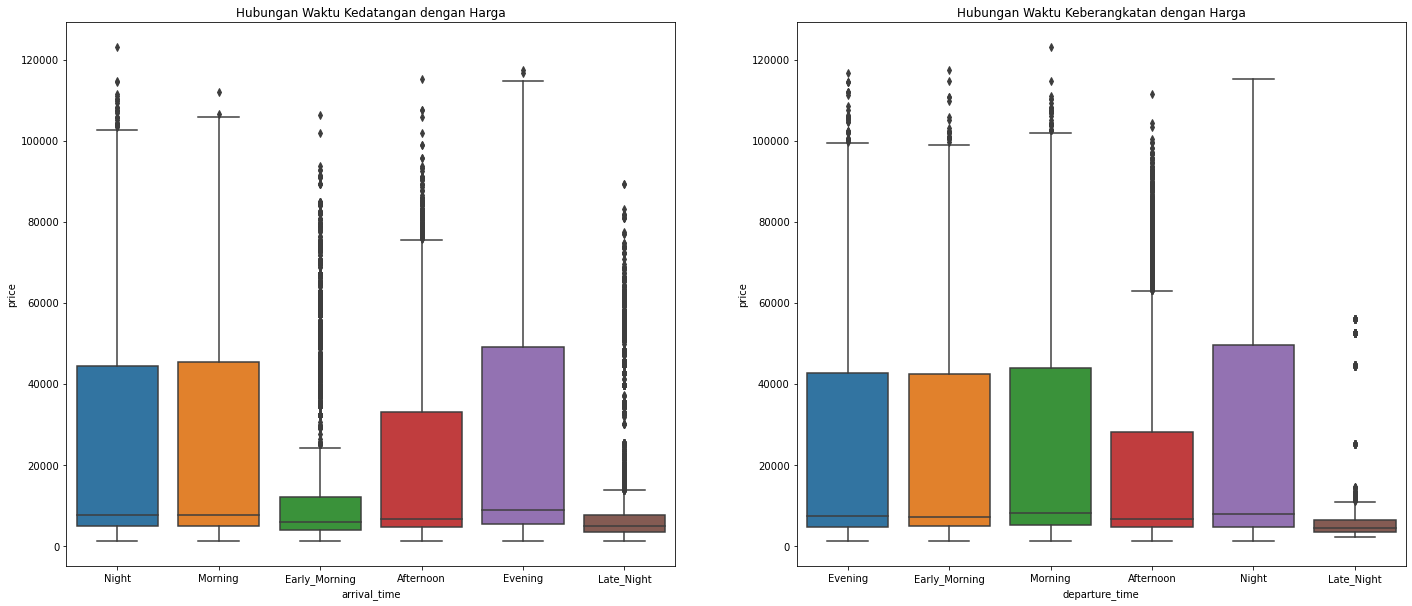

In [13]:
#Membuat BoxPlot hubungan waktu kedatangan dengan harga tiket dan waktu keberangkatan dengan harga
plt.figure(figsize = (24,10))
plt.subplot(1,2,1)
sns.boxplot(data=dfprice, x="arrival_time", y="price")
plt.title("Hubungan Waktu Kedatangan dengan Harga")
plt.subplot(1,2,2)
sns.boxplot(data=dfprice, x="departure_time", y="price")
plt.title("Hubungan Waktu Keberangkatan dengan Harga")
plt.show()

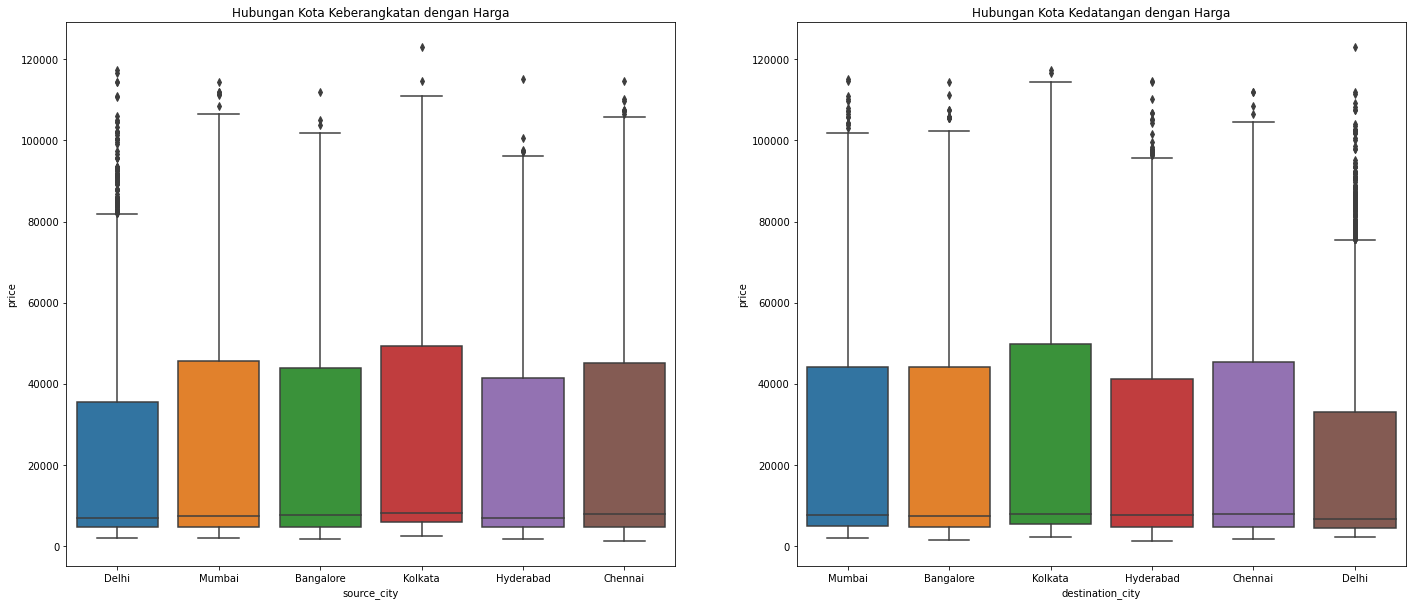

In [14]:
#Membuat BoxPlot hubungan kota keberangkatan dengan harga tiket dan kota kedatangan dengan harga
plt.figure(figsize = (24,10))
plt.subplot(1,2,1)
sns.boxplot(data=dfprice, x="source_city", y="price")
plt.title("Hubungan Kota Keberangkatan dengan Harga")
plt.subplot(1,2,2)
sns.boxplot(data=dfprice, x="destination_city", y="price")
plt.title("Hubungan Kota Kedatangan dengan Harga")
plt.show()

In [15]:
#Membuat visualisasi data hubungan source city, destination city, dan jumlah penerbangan
dfprice.groupby(['flight','source_city','destination_city','airline','class'], as_index = False).count().groupby(['source_city','destination_city'], as_index = False)['flight'].count().head(10)

,source_city,destination_city,flight
0,Bangalore,Chennai,106
1,Bangalore,Delhi,227
2,Bangalore,Hyderabad,132
3,Bangalore,Kolkata,171
4,Bangalore,Mumbai,175
5,Chennai,Bangalore,69
6,Chennai,Delhi,105
7,Chennai,Hyderabad,82
8,Chennai,Kolkata,110
9,Chennai,Mumbai,94


# F1 (All column included)

In [17]:
cols_dict = {'Model Name' : [],
             'Mean_Absolute_Error_MAE' : [],
             'Adj_R_Square' : [],
             'Root_Mean_Squared_Error_RMSE' : [],
             'Mean_Absolute_Percentage_Error_MAPE' : [],
             'Mean_Squared_Error_MSE' : [],
             'Root_Mean_Squared_Log_Error_RMSLE' : [],
             'R2_Score' : []}
results = pd.DataFrame(cols_dict)

In [18]:
dfbackup1 = dfprice.copy()

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in dfbackup1.columns:
    if dfbackup1[col].dtype == 'object':
        dfbackup1[col] = le.fit_transform(dfbackup1[col])
        
dfbackup1.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,4,1408,2,2,2,5,5,1,2.17,1,5953
1,1,4,1387,2,1,2,4,5,1,2.33,1,5953
2,2,0,1213,2,1,2,1,5,1,2.17,1,5956
3,3,5,1559,2,4,2,0,5,1,2.25,1,5955
4,4,5,1549,2,4,2,4,5,1,2.33,1,5955


In [19]:
x1 = dfbackup1.drop(['price'], axis = 1)
y1 = dfbackup1['price']

In [20]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.30, random_state = 42)
x1_train.shape, y1_train.shape, x1_test.shape, y1_test.shape

((210107, 11), (210107,), (90046, 11), (90046,))

In [21]:
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler(feature_range = (0, 1))
x1_train = mmscaler.fit_transform(x1_train)
x1_test = mmscaler.fit_transform(x1_test)
x1_train = pd.DataFrame(x1_train)
x1_test = pd.DataFrame(x1_test)

In [22]:
#Pembuatan model regresi
from sklearn.linear_model import LinearRegression
modelmlg = LinearRegression()

# Evaluasi Matrix dari setiap model
MM = [modelmlg]
for model in MM:
    
    # fitting model
    model.fit(x1_train, y1_train)
    
    # model prediksi dengan data testing
    y1_pred = model.predict(x1_test)
    
    # print nama model
    print('Nama model', model)
    
    # Metrics Evaluasi terhadap model yang digunakan
    
    from sklearn import metrics
    print('Mean Absolute Error (MAE): ', round(metrics.mean_absolute_error(y1_test, y1_pred), 3))
    print('Mean Squared Error (MSE): ', round(metrics.mean_squared_error(y1_test, y1_pred), 3))
    print('Root Mean Squared Error (RMSE): ', round(np.sqrt(metrics.mean_squared_error(y1_test, y1_pred)), 3))
    print('R2 Score: ', round(metrics.r2_score(y1_test, y1_pred), 5))
    print('Root Mean Squared Log Error (RMSLE): ', round(np.log(np.sqrt(metrics.mean_squared_error(y1_test, y1_pred))), 3))
    
    # Fungsi untuk menghitung MAPE - Mean Absolute Percentage Error
    def MAPE(y1_test, y1_pred):
        y1_test, y1_pred = np.array(y1_test), np.array(y1_pred)
        return np.mean(np.abs((y1_test - y1_pred) / y1_test)) * 100
    
    # EvaluasiMAPE
    result = MAPE(y1_test, y1_pred)
    print('Mean Absolute Percentage Error (MAPE): ', round(result, 2), '%')
    
    # Nilai R Squared values
    r_squared = round(metrics.r2_score(y1_test, y1_pred), 6)
    adjusted_r_squared = round(1-(1-r_squared)*(len(y1)-1) / (len(y1)-x1.shape[1]-1), 6)
    print('Adjusted R Square: ', adjusted_r_squared)
    print("-------------------------------------------------------------------------")
    new_row = {'Nama Model' : model,
             'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y1_test, y1_pred),
             'Adj_R_Square' : adjusted_r_squared,
             'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y1_test, y1_pred)),
             'Mean_Absolute_Percentage_Error_MAPE' : MAPE(y1_test, y1_pred),
             'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y1_test, y1_pred),
             'Root_Mean_Squared_Log_Error_RMSLE' : np.log(np.sqrt(metrics.mean_squared_error(y1_test, y1_pred))),
             'R2_Score' : metrics.r2_score(y1_test, y1_pred)}
    results = results.append(new_row, ignore_index = True)

Nama model LinearRegression()
Mean Absolute Error (MAE):  4630.541
Mean Squared Error (MSE):  49057844.123
Root Mean Squared Error (RMSE):  7004.131
R2 Score:  0.90468
Root Mean Squared Log Error (RMSLE):  8.854
Mean Absolute Percentage Error (MAPE):  43.89 %
Adjusted R Square:  0.904677
-------------------------------------------------------------------------


/var/folders/zn/s1_n07kn17g1_nt548vj1tp40000gn/T/ipykernel_46319/4161931367.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index = True)


In [23]:
x1 = x1[["airline", "source_city", "departure_time", "stops", 'arrival_time', "destination_city", 
       "class", 'days_left', 'duration']]
X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.20)
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler(feature_range=(0,1))
X1_train = mmscaler.fit_transform(X1_train)
X1_test = mmscaler.fit_transform(X1_test)
X1_train = pd.DataFrame(X1_train)
X1_test = pd.DataFrame(X1_test) 

In [24]:
from sklearn import metrics
def evaluate_model(y1_pred,y1_test):
    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y1_test, y1_pred),3))  
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y1_test, y1_pred)),3))

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rf_reg = RandomForestRegressor()
rf_reg.fit(X1_train,y1_train)
y1_pred = rf_reg.predict(X1_test)
evaluate_model(y1_pred,y1_test)
print("R2 Score: ",r2_score(y1_test,y1_pred))

Mean Absolute Error (MAE): 2298.673
Root Mean Squared Error (RMSE): 4639.801
R2 Score:  0.9585794429584916


# F2 (Stops column excluded)

In [26]:
dfbackup2 = dfprice.copy()

dfbackup2.drop(['stops'], axis = 1, inplace=True)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in dfbackup2.columns:
    if dfbackup2[col].dtype == 'object':
        dfbackup2[col] = le.fit_transform(dfbackup2[col])
        
dfbackup2.head()

,Unnamed: 0,airline,flight,source_city,departure_time,arrival_time,destination_city,class,duration,days_left,price
0,0,4,1408,2,2,5,5,1,2.17,1,5953
1,1,4,1387,2,1,4,5,1,2.33,1,5953
2,2,0,1213,2,1,1,5,1,2.17,1,5956
3,3,5,1559,2,4,0,5,1,2.25,1,5955
4,4,5,1549,2,4,4,5,1,2.33,1,5955


In [27]:
x2 = dfbackup2.drop(['price'], axis = 1)
y2 = dfbackup2['price']

In [28]:
from sklearn.model_selection import train_test_split
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.30, random_state = 42)
x2_train.shape, y2_train.shape, x2_test.shape, y2_test.shape

((210107, 10), (210107,), (90046, 10), (90046,))

In [29]:
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler(feature_range = (0, 1))
x2_train = mmscaler.fit_transform(x2_train)
x2_test = mmscaler.fit_transform(x2_test)
x2_train = pd.DataFrame(x2_train)
x2_test = pd.DataFrame(x2_test)

In [30]:
#Pembuatan model regresi
from sklearn.linear_model import LinearRegression
modelmlg = LinearRegression()

# Evaluasi Matrix dari setiap model
MM = [modelmlg]
for model in MM:
    
    # fitting model
    model.fit(x2_train, y2_train)
    
    # model prediksi dengan data testing
    y2_pred = model.predict(x2_test)
    
    # print nama model
    print('Nama model', model)
    
    # Metrics Evaluasi terhadap model yang digunakan
    
    from sklearn import metrics
    print('Mean Absolute Error (MAE): ', round(metrics.mean_absolute_error(y2_test, y2_pred), 3))
    print('Mean Squared Error (MSE): ', round(metrics.mean_squared_error(y2_test, y2_pred), 3))
    print('Root Mean Squared Error (RMSE): ', round(np.sqrt(metrics.mean_squared_error(y2_test, y2_pred)), 3))
    print('R2 Score: ', round(metrics.r2_score(y2_test, y2_pred), 5))
    print('Root Mean Squared Log Error (RMSLE): ', round(np.log(np.sqrt(metrics.mean_squared_error(y2_test, y2_pred))), 3))
    
    # Fungsi untuk menghitung MAPE - Mean Absolute Percentage Error
    def MAPE(y2_test, y2_pred):
        y2_test, y2_pred = np.array(y2_test), np.array(y2_pred)
        return np.mean(np.abs((y2_test - y2_pred) / y2_test)) * 100
    
    # EvaluasiMAPE
    result = MAPE(y2_test, y2_pred)
    print('Mean Absolute Percentage Error (MAPE): ', round(result, 2), '%')
    
    # Nilai R Squared values
    r_squared = round(metrics.r2_score(y2_test, y2_pred), 6)
    adjusted_r_squared = round(1-(1-r_squared)*(len(y2)-1) / (len(y2)-x2.shape[1]-1), 6)
    print('Adjusted R Square: ', adjusted_r_squared)
    print("-------------------------------------------------------------------------")
    new_row = {'Nama Model' : model,
             'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y2_test, y2_pred),
             'Adj_R_Square' : adjusted_r_squared,
             'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y2_test, y2_pred)),
             'Mean_Absolute_Percentage_Error_MAPE' : MAPE(y2_test, y2_pred),
             'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y2_test, y2_pred),
             'Root_Mean_Squared_Log_Error_RMSLE' : np.log(np.sqrt(metrics.mean_squared_error(y2_test, y2_pred))),
             'R2_Score' : metrics.r2_score(y2_test, y2_pred)}
    results = results.append(new_row, ignore_index = True)

Nama model LinearRegression()
Mean Absolute Error (MAE):  4485.107
Mean Squared Error (MSE):  52625320.61
Root Mean Squared Error (RMSE):  7254.331
R2 Score:  0.89775
Root Mean Squared Log Error (RMSLE):  8.889
Mean Absolute Percentage Error (MAPE):  35.37 %
Adjusted R Square:  0.897746
-------------------------------------------------------------------------


/var/folders/zn/s1_n07kn17g1_nt548vj1tp40000gn/T/ipykernel_46319/2700405951.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index = True)


In [31]:
x2 = x2[["airline", "source_city", "departure_time", 'arrival_time', "destination_city", 
       "class", 'days_left', 'duration']]
X2_train, X2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.20)
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler(feature_range=(0,1))
X2_train = mmscaler.fit_transform(X2_train)
X2_test = mmscaler.fit_transform(X2_test)
X2_train = pd.DataFrame(X2_train)
X2_test = pd.DataFrame(X2_test) 

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rf_reg = RandomForestRegressor()
rf_reg.fit(X2_train,y2_train)
y2_pred = rf_reg.predict(X2_test)
evaluate_model(y2_pred,y2_test)
print("R2 Score: ",r2_score(y2_test,y2_pred))

Mean Absolute Error (MAE): 2161.854
Root Mean Squared Error (RMSE): 4455.05
R2 Score:  0.961656562365467


# F3 (Class column excluded)

In [33]:
dfbackup3 = dfprice.copy()

dfbackup3.drop(['class'], axis = 1, inplace=True)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in dfbackup3.columns:
    if dfbackup3[col].dtype == 'object':
        dfbackup3[col] = le.fit_transform(dfbackup3[col])
        
dfbackup3.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,duration,days_left,price
0,0,4,1408,2,2,2,5,5,2.17,1,5953
1,1,4,1387,2,1,2,4,5,2.33,1,5953
2,2,0,1213,2,1,2,1,5,2.17,1,5956
3,3,5,1559,2,4,2,0,5,2.25,1,5955
4,4,5,1549,2,4,2,4,5,2.33,1,5955


In [34]:
x3 = dfbackup3.drop(['price'], axis = 1)
y3 = dfbackup3['price']

In [35]:
from sklearn.model_selection import train_test_split
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size = 0.30, random_state = 42)
x3_train.shape, y3_train.shape, x3_test.shape, y3_test.shape

((210107, 10), (210107,), (90046, 10), (90046,))

In [36]:
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler(feature_range = (0, 1))
x3_train = mmscaler.fit_transform(x3_train)
x3_test = mmscaler.fit_transform(x3_test)
x3_train = pd.DataFrame(x3_train)
x3_test = pd.DataFrame(x3_test)

In [37]:
#Pembuatan model regresi
from sklearn.linear_model import LinearRegression
modelmlg = LinearRegression()

# Evaluasi Matrix dari setiap model
MM = [modelmlg]
for model in MM:
    
    # fitting model
    model.fit(x3_train, y3_train)
    
    # model prediksi dengan data testing
    y3_pred = model.predict(x3_test)
    
    # print nama model
    print('Nama model', model)
    
    # Metrics Evaluasi terhadap model yang digunakan
    
    from sklearn import metrics
    print('Mean Absolute Error (MAE): ', round(metrics.mean_absolute_error(y3_test, y3_pred), 3))
    print('Mean Squared Error (MSE): ', round(metrics.mean_squared_error(y3_test, y3_pred), 3))
    print('Root Mean Squared Error (RMSE): ', round(np.sqrt(metrics.mean_squared_error(y3_test, y3_pred)), 3))
    print('R2 Score: ', round(metrics.r2_score(y3_test, y3_pred), 5))
    print('Root Mean Squared Log Error (RMSLE): ', round(np.log(np.sqrt(metrics.mean_squared_error(y3_test, y3_pred))), 3))
    
    # Fungsi untuk menghitung MAPE - Mean Absolute Percentage Error
    def MAPE(y3_test, y3_pred):
        y3_test, y3_pred = np.array(y3_test), np.array(y3_pred)
        return np.mean(np.abs((y3_test - y3_pred) / y3_test)) * 100
    
    # EvaluasiMAPE
    result = MAPE(y3_test, y3_pred)
    print('Mean Absolute Percentage Error (MAPE): ', round(result, 2), '%')
    
    # Nilai R Squared values
    r_squared = round(metrics.r2_score(y3_test, y3_pred), 6)
    adjusted_r_squared = round(1-(1-r_squared)*(len(y3)-1) / (len(y3)-x3.shape[1]-1), 6)
    print('Adjusted R Square: ', adjusted_r_squared)
    print("-------------------------------------------------------------------------")
    new_row = {'Nama Model' : model,
             'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y3_test, y3_pred),
             'Adj_R_Square' : adjusted_r_squared,
             'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y3_test, y3_pred)),
             'Mean_Absolute_Percentage_Error_MAPE' : MAPE(y3_test, y3_pred),
             'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y3_test, y3_pred),
             'Root_Mean_Squared_Log_Error_RMSLE' : np.log(np.sqrt(metrics.mean_squared_error(y3_test, y3_pred))),
             'R2_Score' : metrics.r2_score(y3_test, y3_pred)}
    results = results.append(new_row, ignore_index = True)

Nama model LinearRegression()
Mean Absolute Error (MAE):  11371.47
Mean Squared Error (MSE):  191807595.453
Root Mean Squared Error (RMSE):  13849.462
R2 Score:  0.62732
Root Mean Squared Log Error (RMSLE):  9.536
Mean Absolute Percentage Error (MAPE):  156.69 %
Adjusted R Square:  0.627305
-------------------------------------------------------------------------


/var/folders/zn/s1_n07kn17g1_nt548vj1tp40000gn/T/ipykernel_46319/1276591059.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index = True)


In [38]:
x3 = x3[["airline", "source_city", "departure_time", "stops", 'arrival_time', "destination_city", 'days_left', 'duration']]
X3_train, X3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.20)
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler(feature_range=(0,1))
X3_train = mmscaler.fit_transform(X3_train)
X3_test = mmscaler.fit_transform(X3_test)
X3_train = pd.DataFrame(X3_train)
X3_test = pd.DataFrame(X3_test) 

In [39]:
from sklearn import metrics
def evaluate_model(y3_pred,y3_test):
    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y3_test, y3_pred),3))  
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y3_test, y3_pred)),3))

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rf_reg = RandomForestRegressor()
rf_reg.fit(X3_train,y3_train)
y3_pred = rf_reg.predict(X3_test)
evaluate_model(y3_pred,y3_test)
print("R2 Score: ",r2_score(y3_test,y3_pred))

Mean Absolute Error (MAE): 15178.739
Root Mean Squared Error (RMSE): 20759.912
R2 Score:  0.16729922734629865


# F4 (Duration column excluded)

In [41]:
dfbackup4 = dfprice.copy()

dfbackup4.drop(['duration'], axis = 1, inplace=True)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in dfbackup4.columns:
    if dfbackup4[col].dtype == 'object':
        dfbackup4[col] = le.fit_transform(dfbackup4[col])
        
dfbackup4.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,days_left,price
0,0,4,1408,2,2,2,5,5,1,1,5953
1,1,4,1387,2,1,2,4,5,1,1,5953
2,2,0,1213,2,1,2,1,5,1,1,5956
3,3,5,1559,2,4,2,0,5,1,1,5955
4,4,5,1549,2,4,2,4,5,1,1,5955


In [42]:
x4 = dfbackup4.drop(['price'], axis = 1)
y4 = dfbackup4['price']

In [43]:
from sklearn.model_selection import train_test_split
x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, test_size = 0.30, random_state = 42)
x4_train.shape, y4_train.shape, x4_test.shape, y4_test.shape

((210107, 10), (210107,), (90046, 10), (90046,))

In [44]:
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler(feature_range = (0, 1))
x4_train = mmscaler.fit_transform(x4_train)
x4_test = mmscaler.fit_transform(x4_test)
x4_train = pd.DataFrame(x4_train)
x4_test = pd.DataFrame(x4_test)

In [45]:
#Pembuatan model regresi
from sklearn.linear_model import LinearRegression
modelmlg = LinearRegression()

# Evaluasi Matrix dari setiap model
MM = [modelmlg]
for model in MM:
    
    # fitting model
    model.fit(x4_train, y4_train)
    
    # model prediksi dengan data testing
    y4_pred = model.predict(x4_test)
    
    # print nama model
    print('Nama model', model)
    
    # Metrics Evaluasi terhadap model yang digunakan
    
    from sklearn import metrics
    print('Mean Absolute Error (MAE): ', round(metrics.mean_absolute_error(y4_test, y4_pred), 3))
    print('Mean Squared Error (MSE): ', round(metrics.mean_squared_error(y4_test, y4_pred), 3))
    print('Root Mean Squared Error (RMSE): ', round(np.sqrt(metrics.mean_squared_error(y4_test, y4_pred)), 3))
    print('R2 Score: ', round(metrics.r2_score(y4_test, y4_pred), 5))
    print('Root Mean Squared Log Error (RMSLE): ', round(np.log(np.sqrt(metrics.mean_squared_error(y4_test, y4_pred))), 3))
    
    # Fungsi untuk menghitung MAPE - Mean Absolute Percentage Error
    def MAPE(y4_test, y4_pred):
        y4_test, y4_pred = np.array(y4_test), np.array(y4_pred)
        return np.mean(np.abs((y4_test - y4_pred) / y4_test)) * 100
    
    # EvaluasiMAPE
    result = MAPE(y4_test, y4_pred)
    print('Mean Absolute Percentage Error (MAPE): ', round(result, 2), '%')
    
    # Nilai R Squared values
    r_squared = round(metrics.r2_score(y4_test, y4_pred), 6)
    adjusted_r_squared = round(1-(1-r_squared)*(len(y4)-1) / (len(y4)-x4.shape[1]-1), 6)
    print('Adjusted R Square: ', adjusted_r_squared)
    print("-------------------------------------------------------------------------")
    new_row = {'Nama Model' : model,
             'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y4_test, y4_pred),
             'Adj_R_Square' : adjusted_r_squared,
             'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y4_test, y4_pred)),
             'Mean_Absolute_Percentage_Error_MAPE' : MAPE(y4_test, y4_pred),
             'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y4_test, y4_pred),
             'Root_Mean_Squared_Log_Error_RMSLE' : np.log(np.sqrt(metrics.mean_squared_error(y4_test, y4_pred))),
             'R2_Score' : metrics.r2_score(y4_test, y4_pred)}
    results = results.append(new_row, ignore_index = True)

Nama model LinearRegression()
Mean Absolute Error (MAE):  4657.463
Mean Squared Error (MSE):  49322223.103
Root Mean Squared Error (RMSE):  7022.978
R2 Score:  0.90417
Root Mean Squared Log Error (RMSLE):  8.857
Mean Absolute Percentage Error (MAPE):  44.57 %
Adjusted R Square:  0.904164
-------------------------------------------------------------------------


/var/folders/zn/s1_n07kn17g1_nt548vj1tp40000gn/T/ipykernel_46319/1669501439.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index = True)


In [46]:
x4 = x4[["airline", "source_city", "departure_time", "stops", 'arrival_time', "destination_city", 
       "class", 'days_left']]
X4_train, X4_test, y4_train, y4_test = train_test_split(x4, y4, test_size=0.20)
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler(feature_range=(0,1))
X4_train = mmscaler.fit_transform(X4_train)
X4_test = mmscaler.fit_transform(X4_test)
X4_train = pd.DataFrame(X4_train)
X4_test = pd.DataFrame(X4_test) 

In [47]:
from sklearn import metrics
def evaluate_model(y4_pred,y4_test):
    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y4_test, y4_pred),3))  
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y4_test, y4_pred)),3))

In [48]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rf_reg = RandomForestRegressor()
rf_reg.fit(X4_train,y4_train)
y4_pred = rf_reg.predict(X4_test)
evaluate_model(y4_pred,y4_test)
print("R2 Score: ",r2_score(y4_test,y4_pred))

Mean Absolute Error (MAE): 2144.642
Root Mean Squared Error (RMSE): 4360.234
R2 Score:  0.9629873860152065


# F5 (Days Left column excluded)

In [49]:
dfbackup5 = dfprice.copy()

dfbackup5.drop(['days_left'], axis = 1, inplace=True)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in dfbackup5.columns:
    if dfbackup5[col].dtype == 'object':
        dfbackup5[col] = le.fit_transform(dfbackup5[col])
        
dfbackup5.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,price
0,0,4,1408,2,2,2,5,5,1,2.17,5953
1,1,4,1387,2,1,2,4,5,1,2.33,5953
2,2,0,1213,2,1,2,1,5,1,2.17,5956
3,3,5,1559,2,4,2,0,5,1,2.25,5955
4,4,5,1549,2,4,2,4,5,1,2.33,5955


In [50]:
x5 = dfbackup5.drop(['price'], axis = 1)
y5 = dfbackup5['price']

In [51]:
from sklearn.model_selection import train_test_split
x5_train, x5_test, y5_train, y5_test = train_test_split(x5, y5, test_size = 0.30, random_state = 42)
x5_train.shape, y5_train.shape, x5_test.shape, y5_test.shape

((210107, 10), (210107,), (90046, 10), (90046,))

In [52]:
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler(feature_range = (0, 1))
x5_train = mmscaler.fit_transform(x5_train)
x5_test = mmscaler.fit_transform(x5_test)
x5_train = pd.DataFrame(x5_train)
x5_test = pd.DataFrame(x5_test)

In [53]:
#Pembuatan model regresi
from sklearn.linear_model import LinearRegression
modelmlg = LinearRegression()

# Evaluasi Matrix dari setiap model
MM = [modelmlg]
for model in MM:
    
    # fitting model
    model.fit(x5_train, y5_train)
    
    # model prediksi dengan data testing
    y5_pred = model.predict(x5_test)
    
    # print nama model
    print('Nama model', model)
    
    # Metrics Evaluasi terhadap model yang digunakan
    
    from sklearn import metrics
    print('Mean Absolute Error (MAE): ', round(metrics.mean_absolute_error(y5_test, y5_pred), 3))
    print('Mean Squared Error (MSE): ', round(metrics.mean_squared_error(y5_test, y5_pred), 3))
    print('Root Mean Squared Error (RMSE): ', round(np.sqrt(metrics.mean_squared_error(y5_test, y5_pred)), 3))
    print('R2 Score: ', round(metrics.r2_score(y5_test, y5_pred), 5))
    print('Root Mean Squared Log Error (RMSLE): ', round(np.log(np.sqrt(metrics.mean_squared_error(y5_test, y5_pred))), 3))
    
    # Fungsi untuk menghitung MAPE - Mean Absolute Percentage Error
    def MAPE(y5_test, y5_pred):
        y5_test, y5_pred = np.array(y5_test), np.array(y5_pred)
        return np.mean(np.abs((y5_test - y5_pred) / y5_test)) * 100
    
    # EvaluasiMAPE
    result = MAPE(y5_test, y5_pred)
    print('Mean Absolute Percentage Error (MAPE): ', round(result, 2), '%')
    
    # Nilai R Squared values
    r_squared = round(metrics.r2_score(y5_test, y5_pred), 6)
    adjusted_r_squared = round(1-(1-r_squared)*(len(y5)-1) / (len(y5)-x5.shape[1]-1), 6)
    print('Adjusted R Square: ', adjusted_r_squared)
    print("-------------------------------------------------------------------------")
    new_row = {'Nama Model' : model,
             'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y5_test, y5_pred),
             'Adj_R_Square' : adjusted_r_squared,
             'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y5_test, y5_pred)),
             'Mean_Absolute_Percentage_Error_MAPE' : MAPE(y5_test, y5_pred),
             'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y5_test, y5_pred),
             'Root_Mean_Squared_Log_Error_RMSLE' : np.log(np.sqrt(metrics.mean_squared_error(y5_test, y5_pred))),
             'R2_Score' : metrics.r2_score(y5_test, y5_pred)}
    results = results.append(new_row, ignore_index = True)

Nama model LinearRegression()
Mean Absolute Error (MAE):  4917.469
Mean Squared Error (MSE):  52251430.646
Root Mean Squared Error (RMSE):  7228.515
R2 Score:  0.89848
Root Mean Squared Log Error (RMSLE):  8.886
Mean Absolute Percentage Error (MAPE):  47.87 %
Adjusted R Square:  0.898472
-------------------------------------------------------------------------


/var/folders/zn/s1_n07kn17g1_nt548vj1tp40000gn/T/ipykernel_46319/229816190.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index = True)


In [54]:
x5 = x5[["airline", "source_city", "departure_time", "stops", 'arrival_time', "destination_city", 
       "class", 'duration']]
X5_train, X5_test, y5_train, y5_test = train_test_split(x5, y5, test_size=0.20)
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler(feature_range=(0,1))
X5_train = mmscaler.fit_transform(X5_train)
X5_test = mmscaler.fit_transform(X5_test)
X5_train = pd.DataFrame(X5_train)
X5_test = pd.DataFrame(X5_test) 

In [55]:
from sklearn import metrics
def evaluate_model(y5_pred,y5_test):
    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y5_test, y5_pred),3))  
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y5_test, y5_pred)),3))

In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rf_reg = RandomForestRegressor()
rf_reg.fit(X5_train,y5_train)
y5_pred = rf_reg.predict(X5_test)
evaluate_model(y5_pred,y5_test)
print("R2 Score: ",r2_score(y5_test,y5_pred))

Mean Absolute Error (MAE): 2167.148
Root Mean Squared Error (RMSE): 3529.858
R2 Score:  0.9756147474235941


# F6 (Departure & Arrival Time column excluded)

In [57]:
dfbackup6 = dfprice.copy()

dfbackup6.drop(['departure_time'], axis = 1, inplace=True)
dfbackup6.drop(['arrival_time'], axis = 1, inplace=True)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in dfbackup6.columns:
    if dfbackup6[col].dtype == 'object':
        dfbackup6[col] = le.fit_transform(dfbackup6[col])
        
dfbackup6.head()

,Unnamed: 0,airline,flight,source_city,stops,destination_city,class,duration,days_left,price
0,0,4,1408,2,2,5,1,2.17,1,5953
1,1,4,1387,2,2,5,1,2.33,1,5953
2,2,0,1213,2,2,5,1,2.17,1,5956
3,3,5,1559,2,2,5,1,2.25,1,5955
4,4,5,1549,2,2,5,1,2.33,1,5955


In [58]:
x6 = dfbackup6.drop(['price'], axis = 1)
y6 = dfbackup6['price']

In [59]:
from sklearn.model_selection import train_test_split
x6_train, x6_test, y6_train, y6_test = train_test_split(x6, y6, test_size = 0.30, random_state = 42)
x6_train.shape, y6_train.shape, x6_test.shape, y6_test.shape

((210107, 9), (210107,), (90046, 9), (90046,))

In [60]:
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler(feature_range = (0, 1))
x6_train = mmscaler.fit_transform(x6_train)
x6_test = mmscaler.fit_transform(x6_test)
x6_train = pd.DataFrame(x6_train)
x6_test = pd.DataFrame(x6_test)

In [61]:
#Pembuatan model regresi
from sklearn.linear_model import LinearRegression
modelmlg = LinearRegression()

# Evaluasi Matrix dari setiap model
MM = [modelmlg]
for model in MM:
    
    # fitting model
    model.fit(x6_train, y6_train)
    
    # model prediksi dengan data testing
    y6_pred = model.predict(x6_test)
    
    # print nama model
    print('Nama model', model)
    
    # Metrics Evaluasi terhadap model yang digunakan
    
    from sklearn import metrics
    print('Mean Absolute Error (MAE): ', round(metrics.mean_absolute_error(y6_test, y6_pred), 3))
    print('Mean Squared Error (MSE): ', round(metrics.mean_squared_error(y6_test, y6_pred), 3))
    print('Root Mean Squared Error (RMSE): ', round(np.sqrt(metrics.mean_squared_error(y6_test, y6_pred)), 3))
    print('R2 Score: ', round(metrics.r2_score(y6_test, y6_pred), 5))
    print('Root Mean Squared Log Error (RMSLE): ', round(np.log(np.sqrt(metrics.mean_squared_error(y6_test, y6_pred))), 3))
    
    # Fungsi untuk menghitung MAPE - Mean Absolute Percentage Error
    def MAPE(y6_test, y6_pred):
        y6_test, y6_pred = np.array(y6_test), np.array(y6_pred)
        return np.mean(np.abs((y6_test - y6_pred) / y6_test)) * 100
    
    # EvaluasiMAPE
    result = MAPE(y6_test, y6_pred)
    print('Mean Absolute Percentage Error (MAPE): ', round(result, 2), '%')
    
    # Nilai R Squared values
    r_squared = round(metrics.r2_score(y6_test, y6_pred), 6)
    adjusted_r_squared = round(1-(1-r_squared)*(len(y6)-1) / (len(y6)-x6.shape[1]-1), 6)
    print('Adjusted R Square: ', adjusted_r_squared)
    print("-------------------------------------------------------------------------")
    new_row = {'Nama Model' : model,
             'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y6_test, y6_pred),
             'Adj_R_Square' : adjusted_r_squared,
             'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y6_test, y6_pred)),
             'Mean_Absolute_Percentage_Error_MAPE' : MAPE(y6_test, y6_pred),
             'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y6_test, y6_pred),
             'Root_Mean_Squared_Log_Error_RMSLE' : np.log(np.sqrt(metrics.mean_squared_error(y6_test, y6_pred))),
             'R2_Score' : metrics.r2_score(y6_test, y6_pred)}
    results = results.append(new_row, ignore_index = True)

Nama model LinearRegression()
Mean Absolute Error (MAE):  4629.694
Mean Squared Error (MSE):  49167964.03
Root Mean Squared Error (RMSE):  7011.987
R2 Score:  0.90447
Root Mean Squared Log Error (RMSLE):  8.855
Mean Absolute Percentage Error (MAPE):  43.74 %
Adjusted R Square:  0.904463
-------------------------------------------------------------------------


/var/folders/zn/s1_n07kn17g1_nt548vj1tp40000gn/T/ipykernel_46319/2795219984.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index = True)


In [62]:
x6 = x6[["airline", "source_city", "stops", "destination_city", "class", 'days_left', 'duration']]
X6_train, X6_test, y6_train, y6_test = train_test_split(x6, y6, test_size=0.20)
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler(feature_range=(0,1))
X6_train = mmscaler.fit_transform(X6_train)
X6_test = mmscaler.fit_transform(X6_test)
X6_train = pd.DataFrame(X6_train)
X6_test = pd.DataFrame(X6_test) 

In [63]:
from sklearn import metrics
def evaluate_model(y6_pred,y6_test):
    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y6_test, y6_pred),3))  
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y6_test, y6_pred)),3))

In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rf_reg = RandomForestRegressor()
rf_reg.fit(X6_train,y6_train)
y6_pred = rf_reg.predict(X6_test)
evaluate_model(y6_pred,y6_test)
print("R2 Score: ",r2_score(y6_test,y6_pred))

Mean Absolute Error (MAE): 1362.467
Root Mean Squared Error (RMSE): 3298.45
R2 Score:  0.9787768109211448


# F7 (Source & Destination city column excluded)

In [65]:
dfbackup7 = dfprice.copy()

dfbackup7.drop(['source_city'], axis = 1, inplace=True)
dfbackup7.drop(['destination_city'], axis = 1, inplace=True)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in dfbackup7.columns:
    if dfbackup7[col].dtype == 'object':
        dfbackup7[col] = le.fit_transform(dfbackup7[col])
        
dfbackup7.head()

,Unnamed: 0,airline,flight,departure_time,stops,arrival_time,class,duration,days_left,price
0,0,4,1408,2,2,5,1,2.17,1,5953
1,1,4,1387,1,2,4,1,2.33,1,5953
2,2,0,1213,1,2,1,1,2.17,1,5956
3,3,5,1559,4,2,0,1,2.25,1,5955
4,4,5,1549,4,2,4,1,2.33,1,5955


In [66]:
x7 = dfbackup7.drop(['price'], axis = 1)
y7 = dfbackup7['price']

In [67]:
from sklearn.model_selection import train_test_split
x7_train, x7_test, y7_train, y7_test = train_test_split(x7, y7, test_size = 0.30, random_state = 42)
x7_train.shape, y7_train.shape, x7_test.shape, y7_test.shape

((210107, 9), (210107,), (90046, 9), (90046,))

In [68]:
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler(feature_range = (0, 1))
x7_train = mmscaler.fit_transform(x7_train)
x7_test = mmscaler.fit_transform(x7_test)
x7_train = pd.DataFrame(x7_train)
x7_test = pd.DataFrame(x7_test)

In [69]:
#Pembuatan model regresi
from sklearn.linear_model import LinearRegression
modelmlg = LinearRegression()

# Evaluasi Matrix dari setiap model
MM = [modelmlg]
for model in MM:
    
    # fitting model
    model.fit(x7_train, y7_train)
    
    # model prediksi dengan data testing
    y7_pred = model.predict(x7_test)
    
    # print nama model
    print('Nama model', model)
    
    # Metrics Evaluasi terhadap model yang digunakan
    
    from sklearn import metrics
    print('Mean Absolute Error (MAE): ', round(metrics.mean_absolute_error(y7_test, y7_pred), 3))
    print('Mean Squared Error (MSE): ', round(metrics.mean_squared_error(y7_test, y7_pred), 3))
    print('Root Mean Squared Error (RMSE): ', round(np.sqrt(metrics.mean_squared_error(y7_test, y7_pred)), 3))
    print('R2 Score: ', round(metrics.r2_score(y7_test, y7_pred), 5))
    print('Root Mean Squared Log Error (RMSLE): ', round(np.log(np.sqrt(metrics.mean_squared_error(y7_test, y7_pred))), 3))
    
    # Fungsi untuk menghitung MAPE - Mean Absolute Percentage Error
    def MAPE(y7_test, y7_pred):
        y7_test, y7_pred = np.array(y7_test), np.array(y7_pred)
        return np.mean(np.abs((y7_test - y7_pred) / y7_test)) * 100
    
    # EvaluasiMAPE
    result = MAPE(y7_test, y7_pred)
    print('Mean Absolute Percentage Error (MAPE): ', round(result, 2), '%')
    
    # Nilai R Squared values
    r_squared = round(metrics.r2_score(y7_test, y7_pred), 6)
    adjusted_r_squared = round(1-(1-r_squared)*(len(y7)-1) / (len(y7)-x7.shape[1]-1), 6)
    print('Adjusted R Square: ', adjusted_r_squared)
    print("-------------------------------------------------------------------------")
    new_row = {'Nama Model' : model,
             'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y7_test, y7_pred),
             'Adj_R_Square' : adjusted_r_squared,
             'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y7_test, y7_pred)),
             'Mean_Absolute_Percentage_Error_MAPE' : MAPE(y7_test, y7_pred),
             'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y7_test, y7_pred),
             'Root_Mean_Squared_Log_Error_RMSLE' : np.log(np.sqrt(metrics.mean_squared_error(y7_test, y7_pred))),
             'R2_Score' : metrics.r2_score(y7_test, y7_pred)}
    results = results.append(new_row, ignore_index = True)

Nama model LinearRegression()
Mean Absolute Error (MAE):  4626.617
Mean Squared Error (MSE):  49114146.545
Root Mean Squared Error (RMSE):  7008.149
R2 Score:  0.90457
Root Mean Squared Log Error (RMSLE):  8.855
Mean Absolute Percentage Error (MAPE):  43.83 %
Adjusted R Square:  0.904568
-------------------------------------------------------------------------


/var/folders/zn/s1_n07kn17g1_nt548vj1tp40000gn/T/ipykernel_46319/3112261970.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(new_row, ignore_index = True)


In [70]:
x7 = x7[["airline", "departure_time", "stops", 'arrival_time', "class", 'days_left', 'duration']]
X7_train, X7_test, y7_train, y7_test = train_test_split(x7, y7, test_size=0.20)
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler(feature_range=(0,1))
X7_train = mmscaler.fit_transform(X7_train)
X7_test = mmscaler.fit_transform(X7_test)
X7_train = pd.DataFrame(X7_train)
X7_test = pd.DataFrame(X7_test) 

In [71]:
from sklearn import metrics
def evaluate_model(y7_pred,y7_test):
    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y7_test, y7_pred),3))  
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y7_test, y7_pred)),3))

In [72]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rf_reg = RandomForestRegressor()
rf_reg.fit(X7_train,y7_train)
y7_pred = rf_reg.predict(X7_test)
evaluate_model(y7_pred,y7_test)
print("R2 Score: ",r2_score(y7_test,y7_pred))

Mean Absolute Error (MAE): 3583.561
Root Mean Squared Error (RMSE): 6206.436
R2 Score:  0.9247162252759394
